In [11]:
import pandas as pd
data=pd.read_csv('E:/Folder/bank-full.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
data1=pd.read_csv('E:/Folder/bank.csv',sep=';')
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data1['y'].value_counts()

NameError: name 'data1' is not defined

In [4]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
# data1.isnull().sum()

In [12]:
data=pd.get_dummies(data,columns=['default','housing','loan'],drop_first=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['job','education','poutcome','marital','contact','month']

for i in columns:
    data[i]=le.fit_transform(data[i])

In [14]:
data=pd.get_dummies(data,columns=['y'],drop_first=True)

In [15]:
data.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default_yes,housing_yes,loan_yes,y_yes
0,58,4,1,2,2143,2,5,8,261,1,-1,0,3,0,1,0,0
1,44,9,2,1,29,2,5,8,151,1,-1,0,3,0,1,0,0
2,33,2,1,1,2,2,5,8,76,1,-1,0,3,0,1,1,0
3,47,1,1,3,1506,2,5,8,92,1,-1,0,3,0,1,0,0
4,33,11,2,3,1,2,5,8,198,1,-1,0,3,0,0,0,0


In [16]:
data['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [17]:
from sklearn.model_selection import train_test_split
x,y=data.drop(columns=['y_yes'],axis=1),data['y_yes']

In [18]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model3=SVC()
model2=RandomForestClassifier(max_leaf_nodes=15,max_depth=20)
model=LogisticRegression(max_iter=3000)



In [17]:
data['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=13,test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)


In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain_sm,ytrain_sm=sm.fit_resample(xtrain,ytrain)
from collections import Counter
print('no of classes bf fit {}'.format(Counter(ytrain)))
print('no of classes af fit {}'.format(Counter(ytrain_sm)))

no of classes bf fit Counter({0: 31936, 1: 4232})
no of classes af fit Counter({0: 31936, 1: 31936})


In [23]:
model2.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier(max_depth=20, max_leaf_nodes=15)

In [24]:
ypred=model2.predict(xtest)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7986
           1       0.36      0.83      0.50      1057

    accuracy                           0.81      9043
   macro avg       0.67      0.82      0.69      9043
weighted avg       0.90      0.81      0.84      9043



In [19]:
pip install lazypredict

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached tqdm-4.56.0-py2.py3-none-any.whl (72 kB)
  Using cached scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached xgboost-1.1.1-py3-none-win_amd64.whl (54.4 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached numpy-1.19.1-cp38-cp38-win_amd64.whl (13.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [26]:
from sklearn import metrics

In [27]:
import matplotlib.pyplot as plt

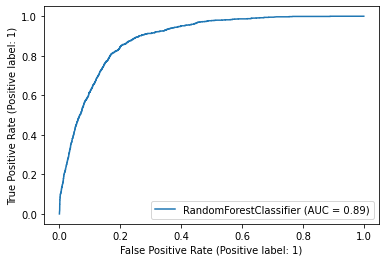

In [28]:
metrics.plot_roc_curve(model2,xtest,ytest)

In [33]:
import pickle
pickle.dump(model2,open('bankpred.pkl','wb'))

In [34]:
model=pickle.load(open('bankpred.pkl','rb'))

In [35]:
pip install flask
